# Coronavirus Disease (COVID-19) Situation Reports

In this notebook we will find ... blah blak wiskas saquetas

## Handling Data
 
lero lero

### Reading Data

blah blah... usa-se pandas

In [1]:
# Defining Global Variables
DATA_FOLDER = 'data'
WORLD_DATA_FILE = 'world-data.csv'

# import the necessary dependencies
import pandas as pd

In [2]:
# read csv
covid_world_dataframe = pd.read_csv(f'{DATA_FOLDER}/{WORLD_DATA_FILE}')
covid_world_dataframe.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


Ah e tal as datas não estão a ser lidas corretamente, ver como [aqui](https://stackoverflow.com/questions/17465045/can-pandas-automatically-recognize-dates)

In [3]:
# creating custom date parser (mm/dd/yy)
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%m/%d/%y')

# re-read csv
covid_world_dataframe = pd.read_csv(f'{DATA_FOLDER}/{WORLD_DATA_FILE}', parse_dates=['Date'], date_parser=custom_date_parser)
covid_world_dataframe.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


## Plotting

ah e tal matplotlic e seaborn

/home/marantesss/Documents/feup-iart/projects/project2/env/lib64/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/projects/project2/env/lib64/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


''

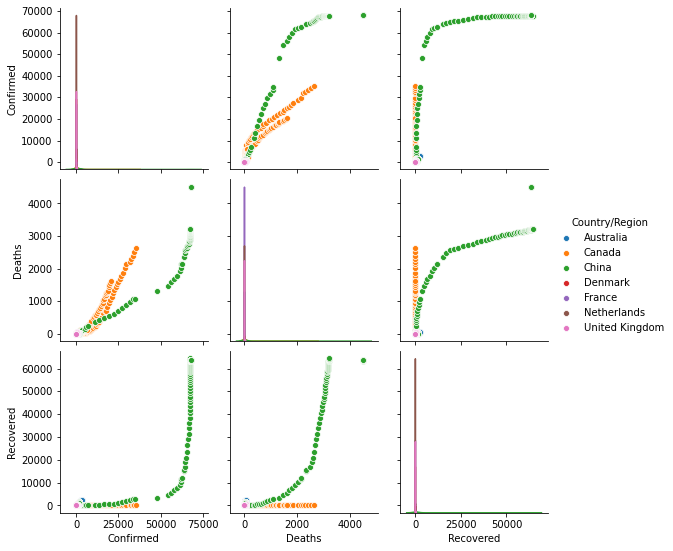

In [4]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
# we need to drop rows with 'NA' values because seaborn does not know what to do with them
sb.pairplot(covid_world_dataframe.dropna(), hue='Country/Region', vars=['Confirmed', 'Deaths', 'Recovered'])
;

**NOTA:** Matplot lib nao gosta de datas: informação [aqui](https://matplotlib.org/3.1.1/gallery/recipes/common_date_problems.html)

Repara que apenas vemos alguns paises porque fizemos `drop` as tabelas que sem *Province/State* é estupido porque perdemos informação de muitos paises, como por exemplo Portugal. Para resolver isto fazemos simplesmente `drop` à coluna que nao importa.

In [5]:
covid_world_dataframe = covid_world_dataframe.drop(labels=['Province/State'], axis=1)
covid_world_dataframe.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


Agora vamos comparar os Estados Unidos *(US)*, Reino Unido *(United Kingdom)*, China *(China)* e Portugal *(Portugal)*

''

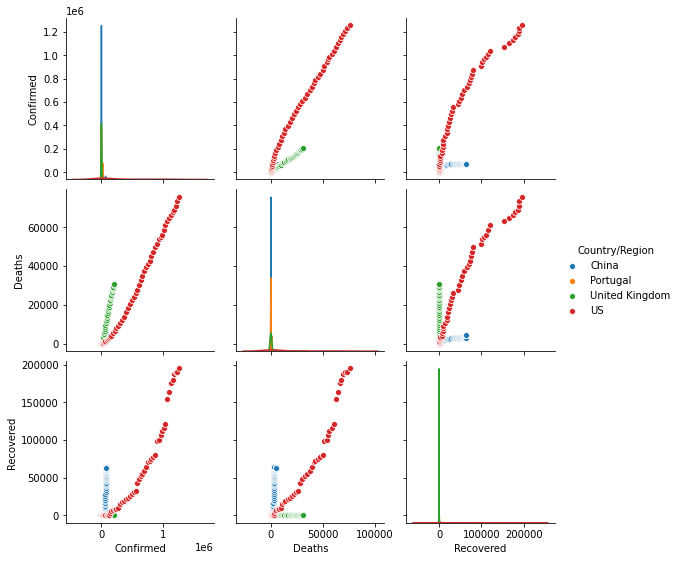

In [93]:
# filter
countries = ['US', 'United Kingdom', 'China', 'Portugal']
selected_countries_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'].isin(countries)]
# plot
sb.pairplot(selected_countries_dataframe, hue='Country/Region', vars=['Confirmed', 'Deaths', 'Recovered'])
;

In [145]:
# set date as index and drop column
# selected_countries_dataframe.set_index('Date', inplace=True, drop=True)
selected_countries_dataframe.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
49,China,31.8257,117.2264,2020-01-22,1,0,0
50,China,40.1824,116.4142,2020-01-22,14,0,0
51,China,30.0572,107.8740,2020-01-22,6,0,0
52,China,26.0789,117.9874,2020-01-22,1,0,0
53,China,37.8099,101.0583,2020-01-22,0,0,0


In [182]:
aggregation_functions = {
    # Calculate the average latitude and longitude
    'Lat': 'mean',
    'Long': 'mean',
    # Calculate the sum of confirmed cases, deaths and recovered of the day
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}
# group by country and date
df_new = selected_countries_dataframe.groupby(['Date', 'Country/Region']).aggregate(aggregation_functions)
# remove country as index
df_new = df_new.reset_index(level=['Country/Region'])
df_new.head(8)

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,,
2020-01-22,China,32.828385,111.649082,548,17,28
2020-01-22,Portugal,39.399900,-8.224500,0,0,0
2020-01-22,US,37.090200,-95.712900,1,0,0
2020-01-22,United Kingdom,24.548173,-43.902245,0,0,0
2020-01-23,China,32.828385,111.649082,643,18,30
2020-01-23,Portugal,39.399900,-8.224500,0,0,0
2020-01-23,US,37.090200,-95.712900,1,0,0
2020-01-23,United Kingdom,24.548173,-43.902245,0,0,0


''

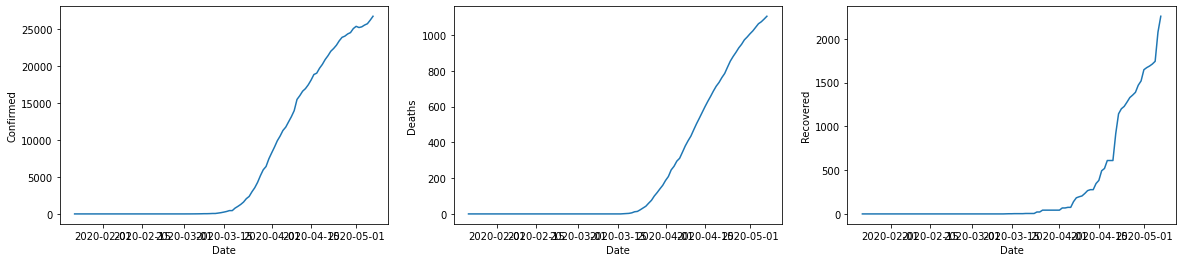

In [220]:
plt.figure(figsize=(20, 4))

covid_portugal_dataframe = df_new.loc[df_new['Country/Region'] == 'Portugal']

plt.subplot(1, 3, 1)
sb.lineplot(x=covid_portugal_dataframe.index, y='Confirmed', data=covid_portugal_dataframe)
plt.subplot(1, 3, 2)
sb.lineplot(x=covid_portugal_dataframe.index, y='Deaths', data=covid_portugal_dataframe)
plt.subplot(1, 3, 3)
sb.lineplot(x=covid_portugal_dataframe.index, y='Recovered', data=covid_portugal_dataframe)
;

In [241]:
test = covid_portugal_dataframe.reset_index()
test = pd.melt(test, ['Date'])
test

,Date,variable,value
0,2020-01-22,Country/Region,Portugal
1,2020-01-23,Country/Region,Portugal
2,2020-01-24,Country/Region,Portugal
3,2020-01-25,Country/Region,Portugal
4,2020-01-26,Country/Region,Portugal
...,...,...,...
637,2020-05-03,Recovered,1689
638,2020-05-04,Recovered,1712
639,2020-05-05,Recovered,1743
640,2020-05-06,Recovered,2076


## Portugal Data from World Dataset

In [27]:
# create portgual dataframe
covid_portugal_dataframe = covid_world_dataframe.loc[covid_world_dataframe['Country/Region'] == 'Portugal']
covid_portugal_dataframe.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
184,Portugal,39.3999,-8.2245,2020-01-22,0,0,0
448,Portugal,39.3999,-8.2245,2020-01-23,0,0,0
712,Portugal,39.3999,-8.2245,2020-01-24,0,0,0
976,Portugal,39.3999,-8.2245,2020-01-25,0,0,0
1240,Portugal,39.3999,-8.2245,2020-01-26,0,0,0


In [28]:
# set date as index and drop column
covid_portugal_dataframe.set_index('Date', inplace=True, drop=True)
covid_portugal_dataframe.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,,
2020-01-22,Portugal,39.3999,-8.2245,0,0,0
2020-01-23,Portugal,39.3999,-8.2245,0,0,0
2020-01-24,Portugal,39.3999,-8.2245,0,0,0
2020-01-25,Portugal,39.3999,-8.2245,0,0,0
2020-01-26,Portugal,39.3999,-8.2245,0,0,0


''

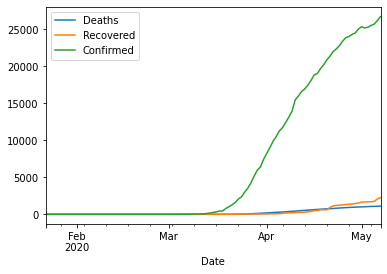

In [29]:
covid_portugal_dataframe[['Deaths', 'Recovered', 'Confirmed']].plot()
;